In [136]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
import pickle
import streamlit as st


In [14]:
dfm = pd.read_csv("mushrooms (1).csv")
dfm.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [145]:
columns = dfm.columns.tolist()
print(columns)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [15]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [16]:
dfm.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
dfm.value_counts()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
p      x          y            y          f        n     f                c             n          w           e            ?           k                         y                         w                       y                       p          w           o            e          w                  v           d          1
e      b          f            g          f        n     f                w             b          g           e            ?           k                         k                         w                       w                       p          w           t            p          w                  n           g          1
                        

In [63]:
y = dfm['class'] 
feature_cols = dfm.columns.drop('class')
enc = OrdinalEncoder()
X_encoded = enc.fit_transform(dfm[feature_cols])

In [64]:
X = pd.DataFrame(X_encoded, columns=feature_cols)

In [65]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,0.0,2.0,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,0.0,2.0,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [66]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [67]:
dfm.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,3,3


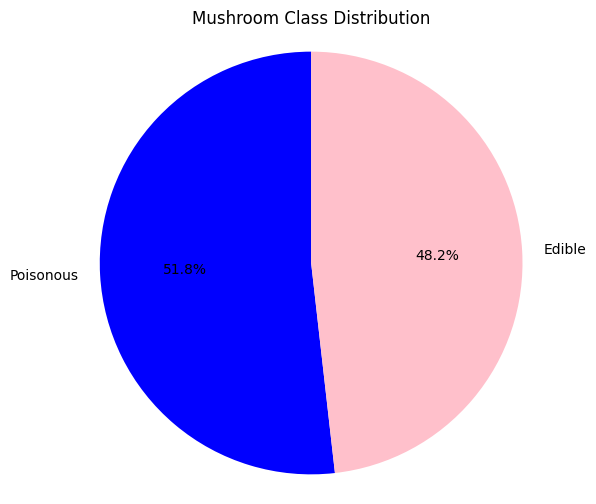

In [104]:
class_counts = dfm['class'].value_counts()
colors = {"blue", "pink"}

# Plot directly
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['Poisonous', 'Edible'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Mushroom Class Distribution')
plt.axis('equal')
plt.show()

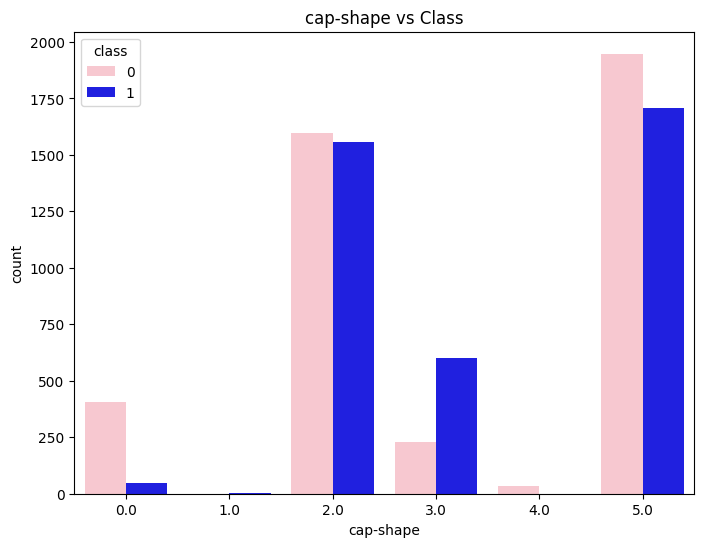

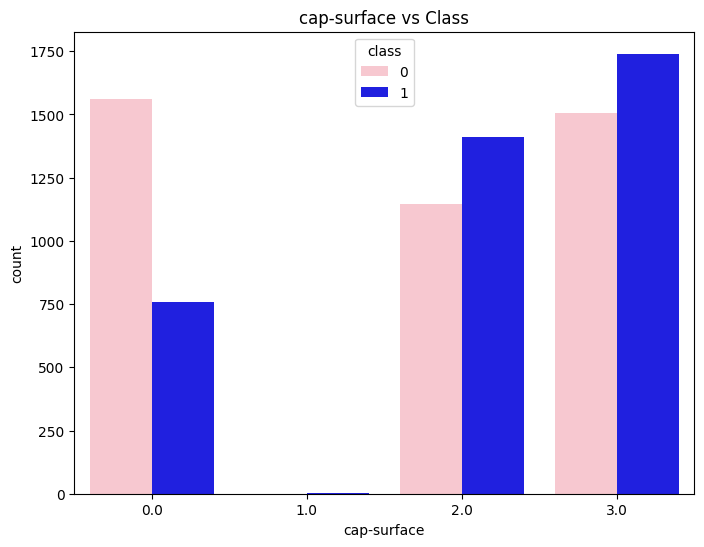

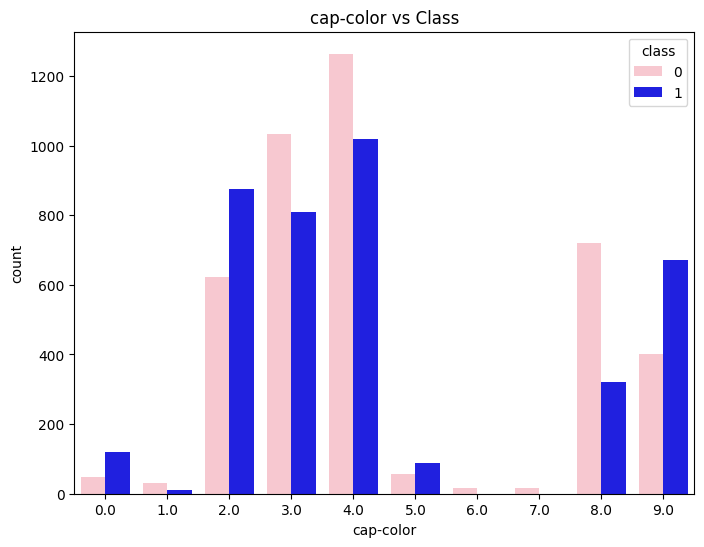

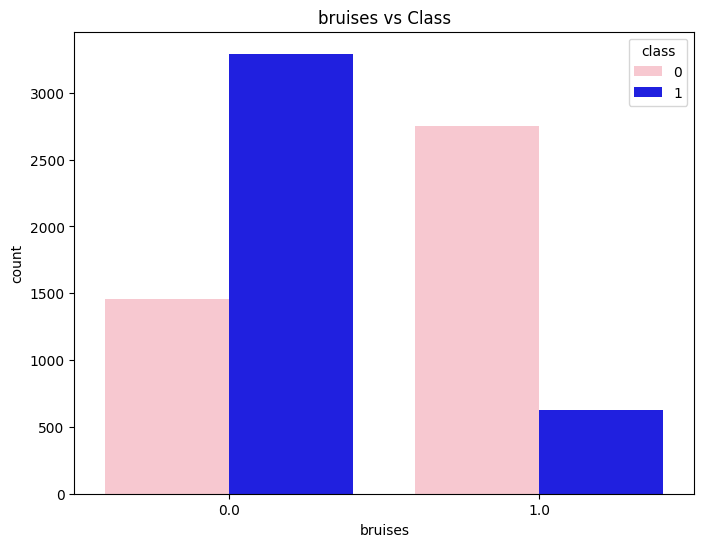

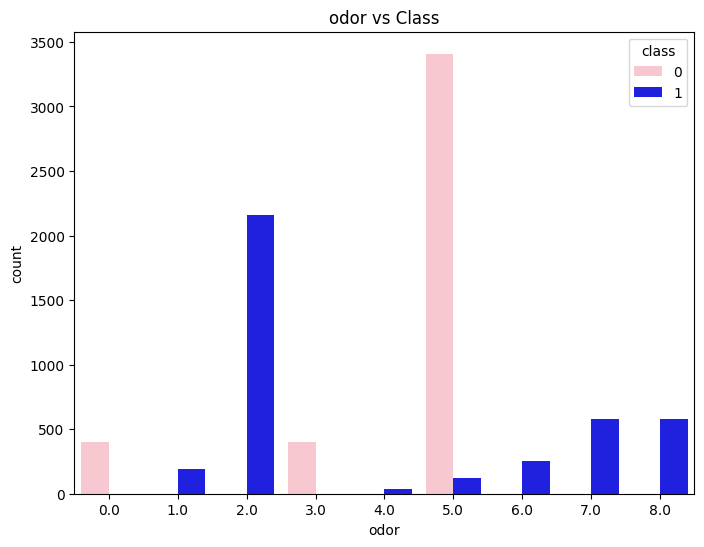

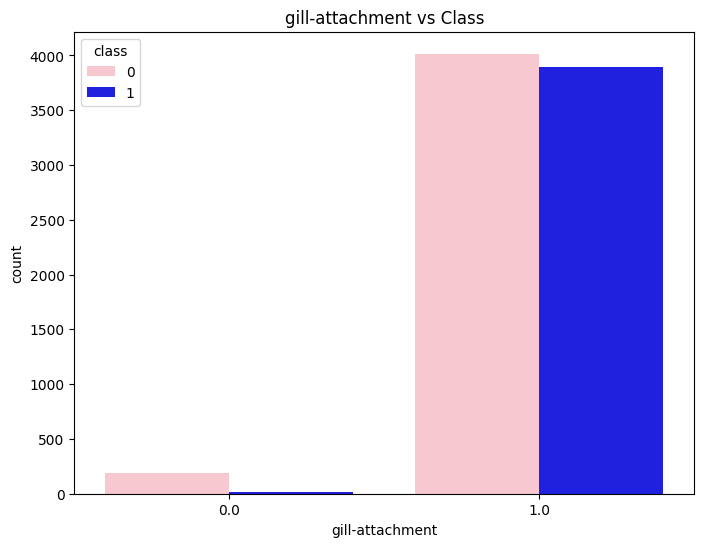

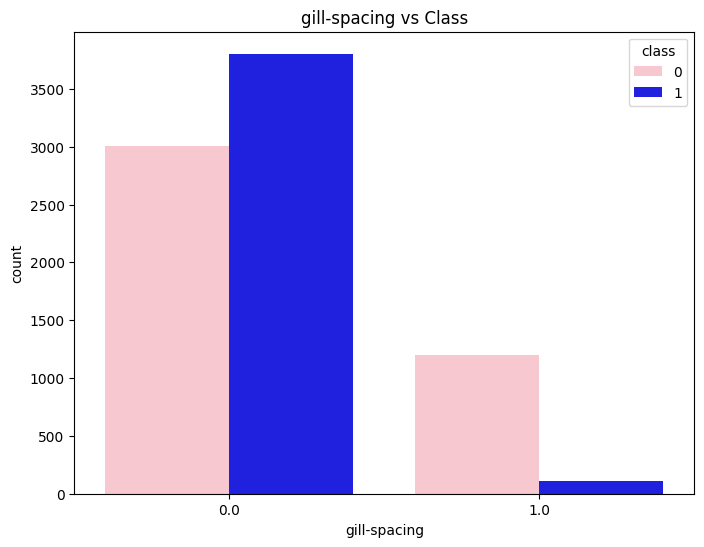

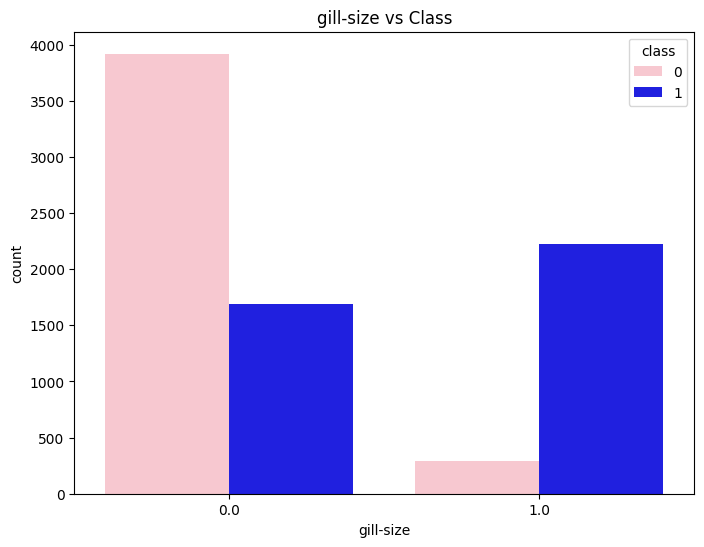

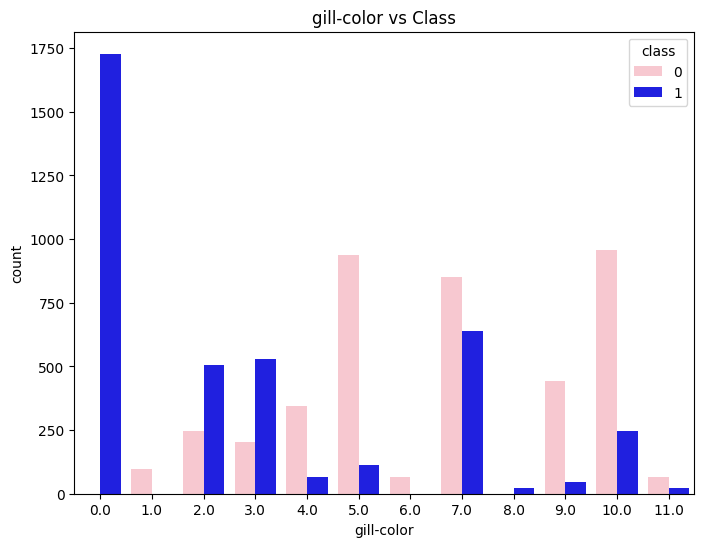

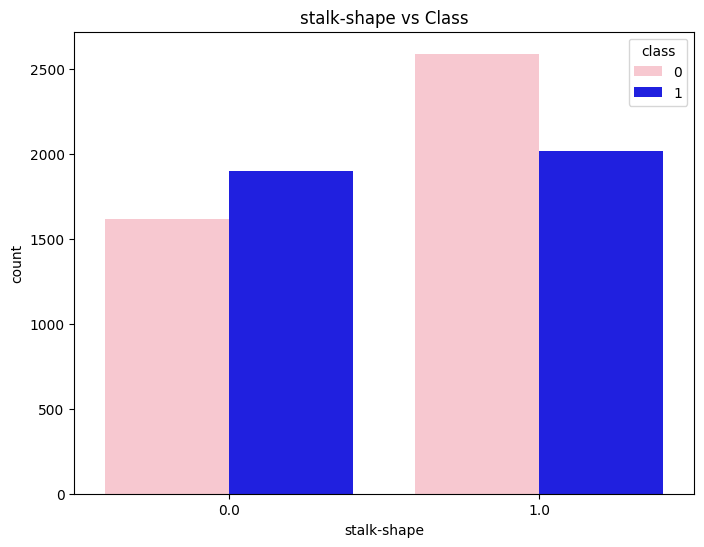

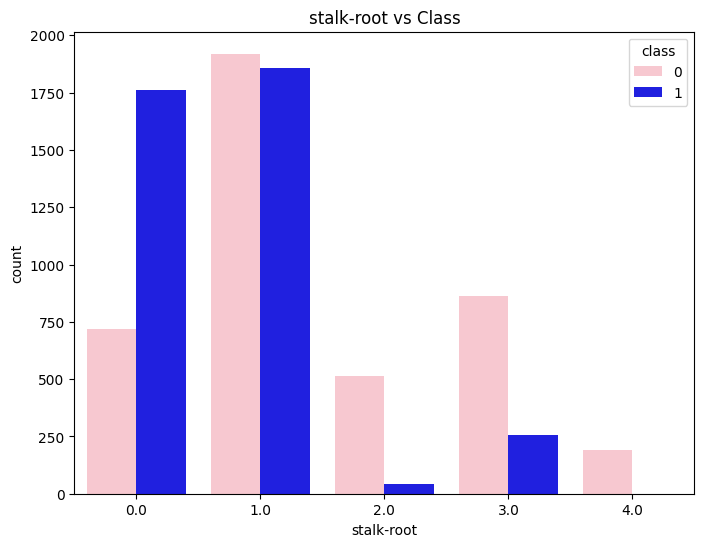

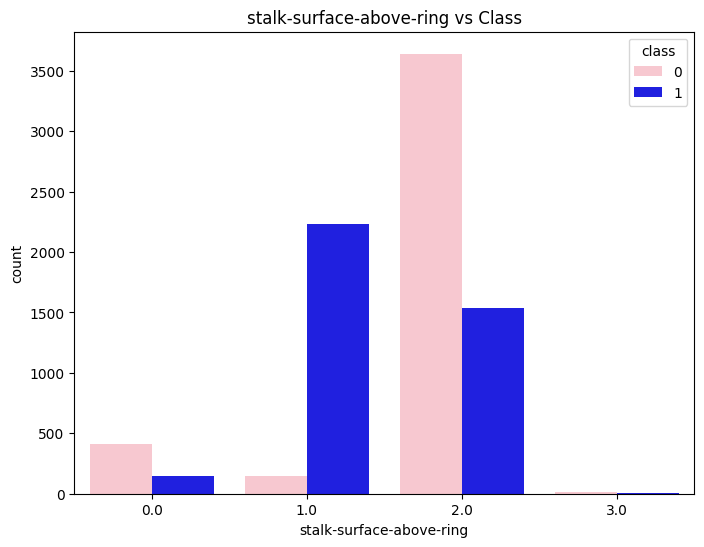

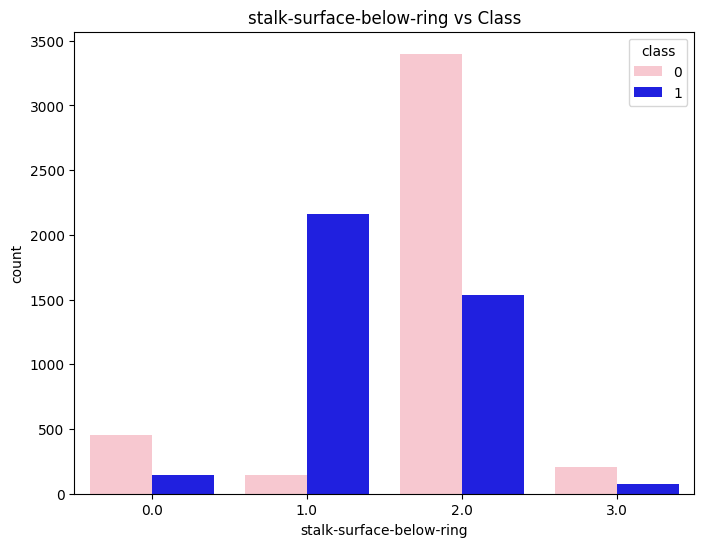

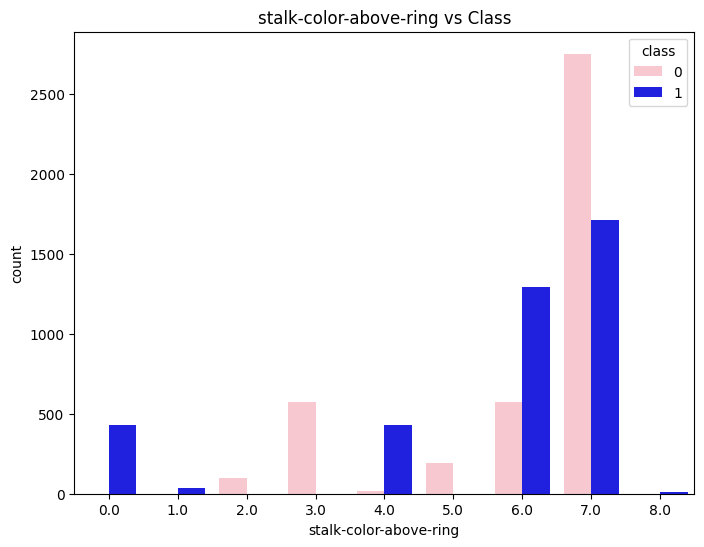

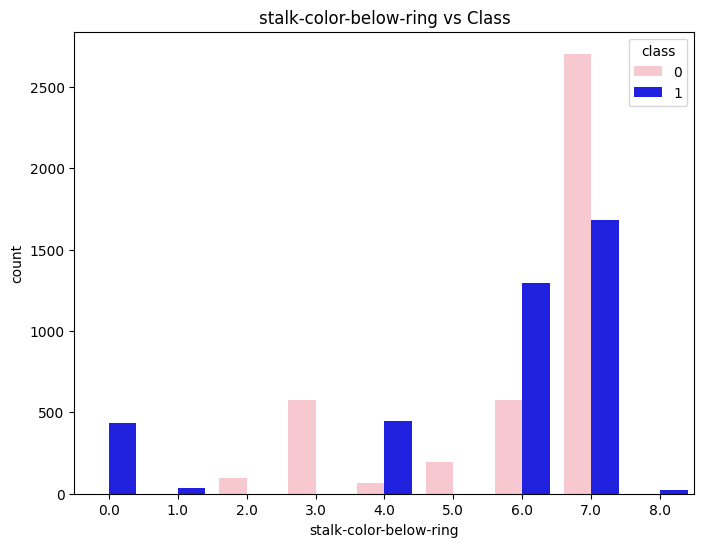

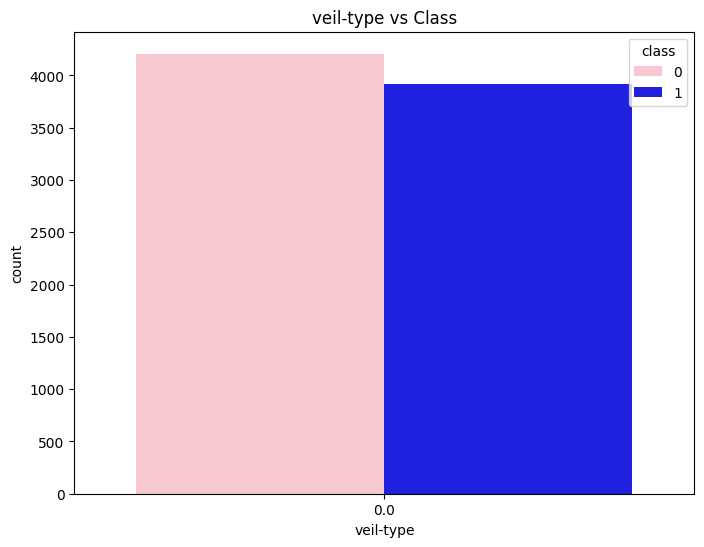

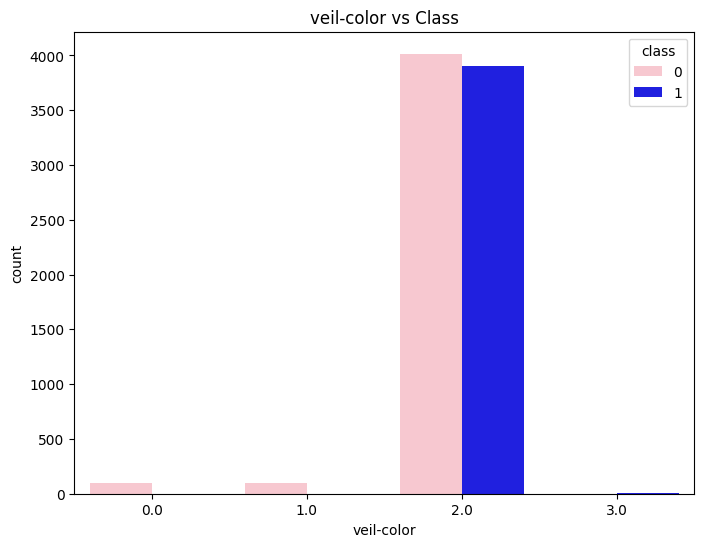

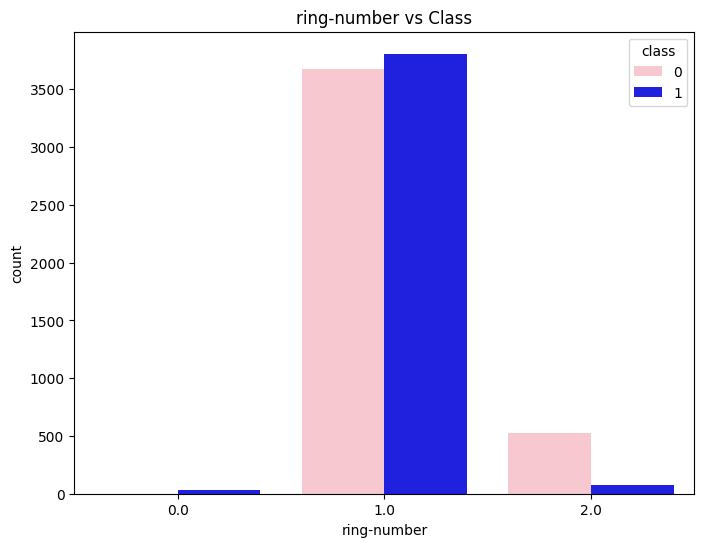

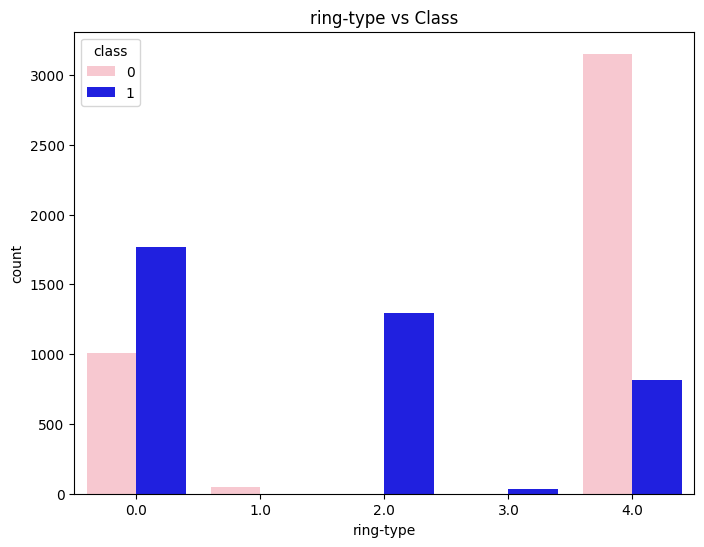

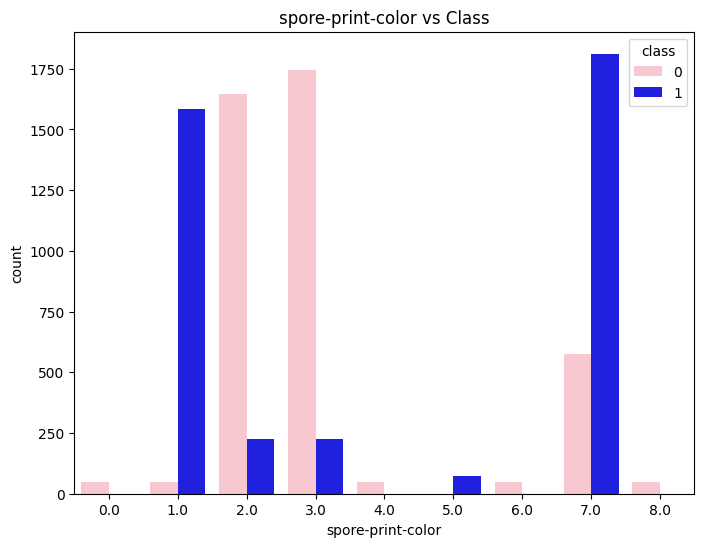

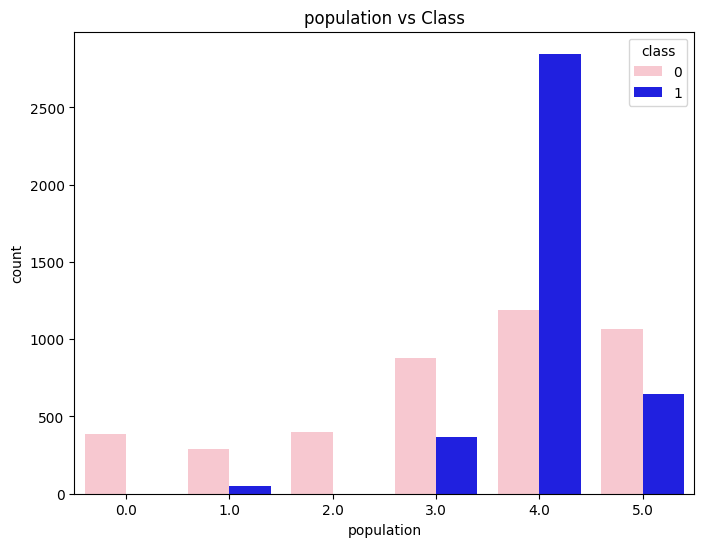

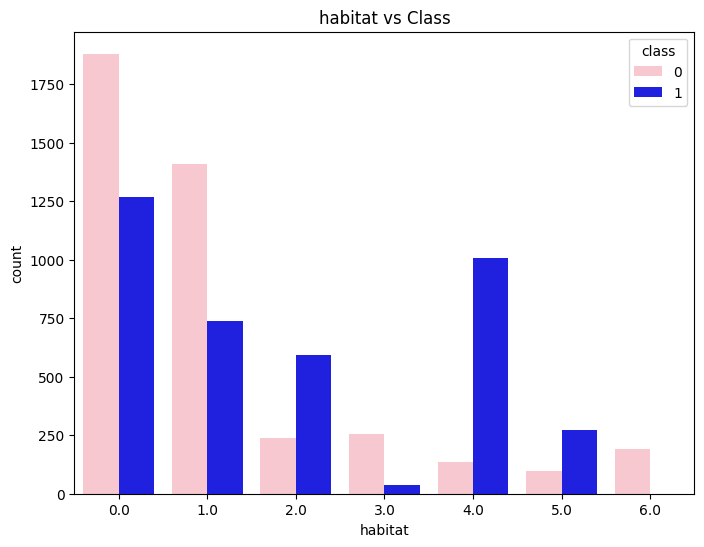

In [103]:
pallete_c = {0: "pink", 1: "blue"}
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=X[col], hue=y, palette=pallete_c)
    plt.title(f'{col} vs Class')
    plt.show()

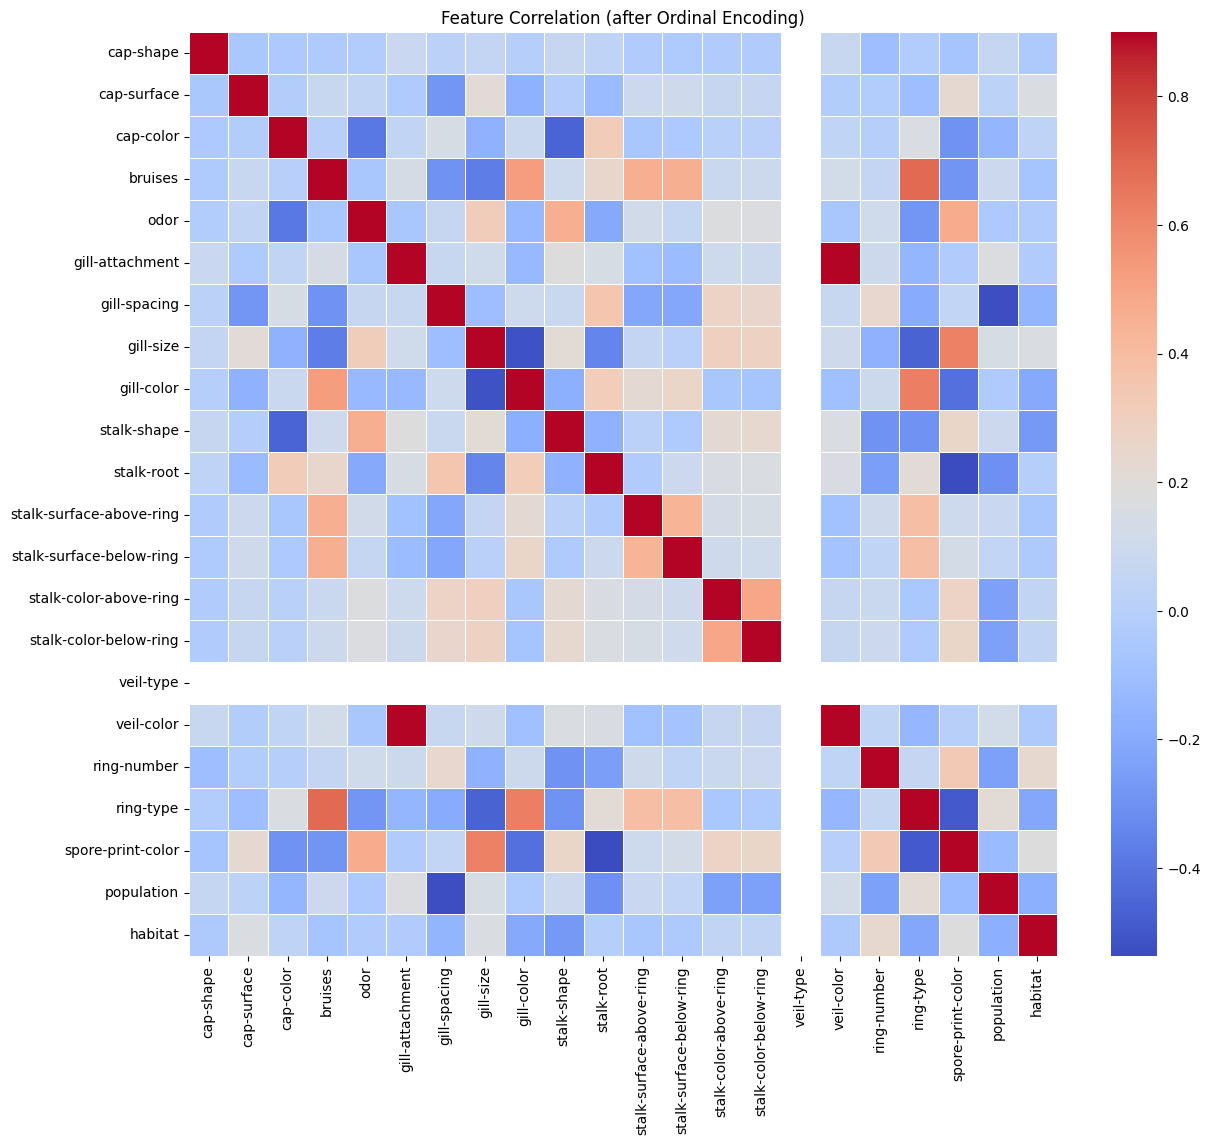

In [68]:
plt.figure(figsize=(14, 12))
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, vmax=0.9)
plt.title("Feature Correlation (after Ordinal Encoding)")
plt.show()

In [106]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [112]:
logr = linear_model.LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [113]:
y_pred_logr = logr.predict(X_test)

In [114]:
print(y_pred_logr)

[0 1 1 ... 1 1 1]


In [115]:
accuracy_log_reg = accuracy_score(y_test, y_pred_logr)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")

Logistic Regression Accuracy: 0.9476923076923077


In [116]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.9956923076923077


In [117]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 1.0


In [118]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 1.0


In [148]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)


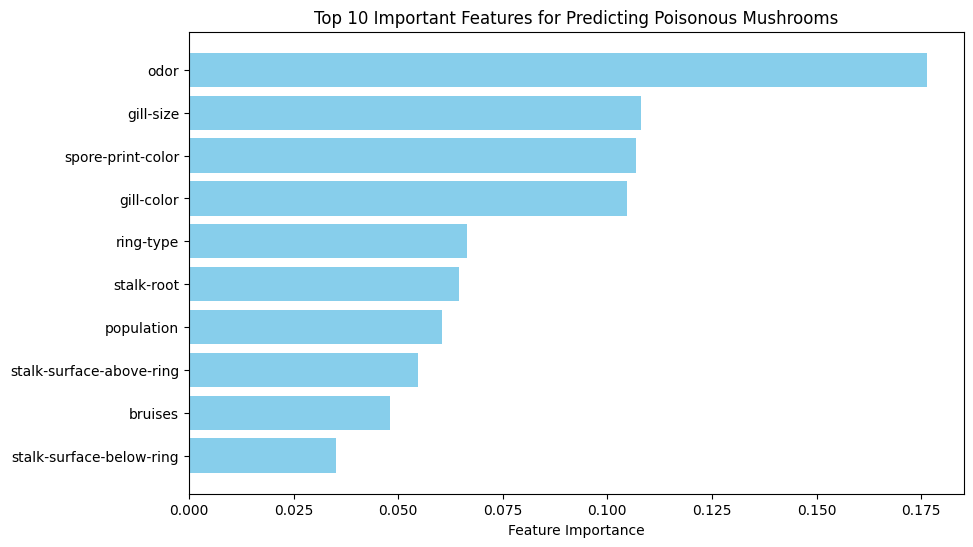

In [151]:
top = importances.head(10)
plt.figure(figsize=(10,6))
plt.barh(top.index, top.values, color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Predicting Poisonous Mushrooms")
plt.show()

In [140]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")


SVM Accuracy: 0.9729230769230769


In [ ]:
with open('svm.pkl', 'wb') as f:
    pickle.dump(svm, f) ##for the model creation on streamlit

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) ##for the model creation on streamlit

In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f) ##for the model creation on streamlit

In [128]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy:{accuracy_nb}")


Naive Bayes Accuracy:0.9218461538461539


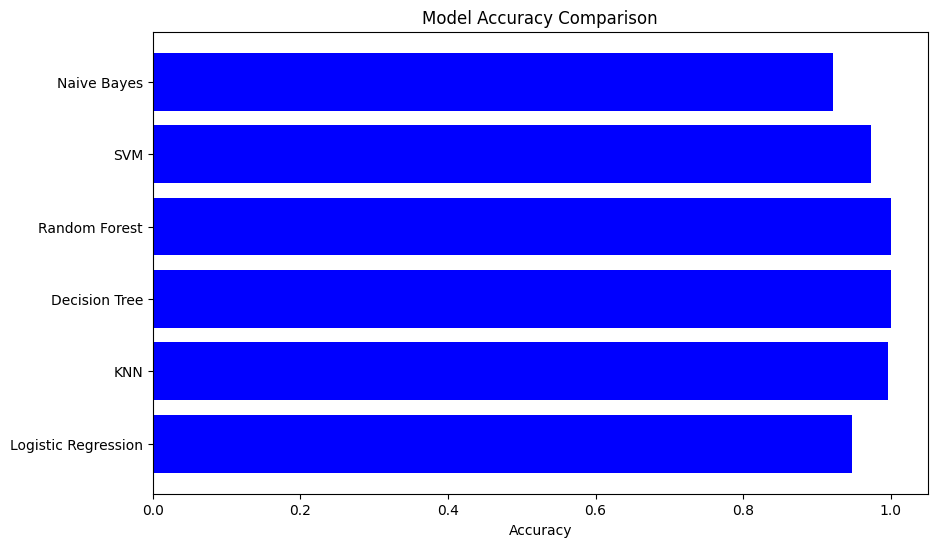

In [123]:
accuracies = [accuracy_log_reg, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_nb]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='blue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [155]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

In [156]:
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict on train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results.append((name, train_acc, test_acc))

# Display
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])
print(results_df)

                    Model  Train Accuracy  Test Accuracy
0     Logistic Regression        0.951685       0.947692
1     K-Nearest Neighbors        0.999846       0.995692
2           Decision Tree        1.000000       1.000000
3           Random Forest        1.000000       1.000000
4  Support Vector Machine        0.989845       0.992615
5             Naive Bayes        0.923527       0.921846


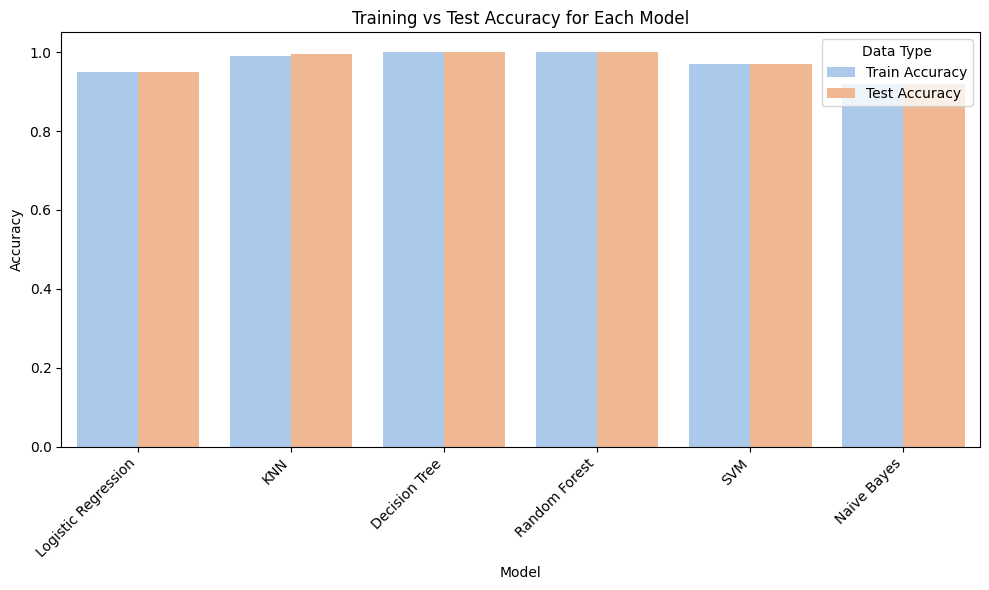

In [163]:
results_df = pd.DataFrame({
     'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes'],
     'Train Accuracy': [0.95, 0.99, 1.00, 1.00, 0.97, 0.92],
     'Test Accuracy': [0.95, 0.996, 1.00, 1.00, 0.97, 0.92]
 })

plot_df = results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                          var_name='Data Type', value_name='Accuracy')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Model', y='Accuracy', hue='Data Type', palette='pastel')

plt.title('Training vs Test Accuracy for Each Model')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Data Type')

plt.tight_layout()